<a href="https://colab.research.google.com/github/helmana/DLeeg/blob/master/model%20layers%20pop/cosin%20dist/%20orth/(T%20Orth)cosian%20dist_%2025%20instance_2000%20pair_%20160%20outer%20shift_Threshold%20verification%20with%20Middle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
subject number = 109 >> 90 train subject  + 19 new subject 
channel number = 20 >> [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]

model3 -  1 layer pop

** subjects  (train subject (ts) , new subject (ns) ):

1) Train subject i (ts[i] )
2) Train Subject i and Train Subject j (ts[i] , ts[j] )
3) Train subject and New subject  (ts , ns)
4) New subject i ( ns[i] )
5) New Subject i and New Subject j (ns[i] , ns[j] )

'''


'\nsubject number = 109 >> 90 train subject  + 19 new subject \nchannel number = 20 >> [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]\n\nmodel3 -  1 layer pop\n\n** subjects  (train subject (ts) , new subject (ns) ):\n\n1) Train subject i (ts[i] )\n2) Train Subject i and Train Subject j (ts[i] , ts[j] )\n3) Train subject and New subject  (ts , ns)\n4) New subject i ( ns[i] )\n5) New Subject i and New Subject j (ns[i] , ns[j] )\n\n'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install mne

     |████████████████████████████████| 6.4MB 4.5MB/s 


In [0]:
'''
Rivision:
980806:
  First version.
  
  

'''

'\nRivision:\n980806:\n  First version.\n  \n  \n\n'

In [0]:
# Parameters:

EpochNum=60
subject_numberT=109
RemoveBaseLine=0
Orthogonal=1
task_index = [1] # task: REO
list_channel=[61,40,10]
TryStr='Try1'
seed = 14

task_number=1
task_time = 60
sampel_number_per_sec =  160 # sampel rate
total_sampel_number =  sampel_number_per_sec *task_time # 60*160
#sample_shift = 4 #step len
inner_sample_shift = 4 # inner step len
outer_sample_shift =160  # outer step len
sample_per_window = 160
window_len= 20
batch_size=64

#Search_Space_Channel = [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]
#Search_Space_Channel_Name=["Fp1","Fp2","F7","F3","Fz","F4","F8","T7","C3","Cz","C4","T8","P7","P3","Pz","P4","P8","O1","Oz","O2"]


In [63]:
# For Visualization
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa

# General use
import itertools
from itertools import combinations 

import os.path
from scipy.spatial import distance
import numpy as np
import math
import random
import datetime
import time
import pytz
from time import gmtime, strftime
import statistics

# General use
import itertools
from itertools import combinations 
import statistics
import csv
import os.path
from scipy.spatial import distance
import numpy as np
import math
import random
import datetime
import time
import pytz
from time import gmtime, strftime


# For model training
from keras import layers
from keras import models
from keras import regularizers
from keras.utils import to_categorical
from keras import optimizers
from keras import backend as KerasBackend
from keras.models import load_model
from keras import backend as KerasBackend
from keras.callbacks import EarlyStopping



# EEG Tools
import mne
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne import io
from mne import viz
from mne import Epochs, io, pick_types
from mne.event import define_target_events
from mne.time_frequency import psd_welch
print(__doc__)



Automatically created module for IPython interactive environment


In [0]:
# load dataset in array
task_number= len(task_index)

# load dataset in array
list_raw_fnames = [[0]*task_number]*subject_numberT
for x in range(subject_numberT):
  list_raw_fnames[x] = mne.datasets.eegbci.load_data(x+1,task_index,path='/content/drive/My Drive/Deep Results/Database')

list_rawdata = np.zeros((subject_numberT,task_number), dtype='object')

for i in range(subject_numberT):
  for j in range(task_number):
    list_rawdata[i][j] = mne.io.read_raw_edf(list_raw_fnames[i][j], preload=True)


In [64]:
subject_number = 90
# new subject
new_subject =np.arange(subject_number, subject_numberT)

# img for each subject
subject_img_number = math.floor((total_sampel_number - sample_per_window - (window_len-1 )*inner_sample_shift) / outer_sample_shift) +1
np.random.seed(seed)  

subject_number_array_shuffled=np.arange(subject_number)
np.random.shuffle(subject_number_array_shuffled)

subject_img_number_array_shuffled=np.arange(subject_img_number)
np.random.shuffle(subject_img_number_array_shuffled)

train_index = math.floor(len(subject_img_number_array_shuffled)* 0.75)
val_index = train_index + (train_index//5)

train_shuff = subject_img_number_array_shuffled[:train_index]
val_shuff = subject_img_number_array_shuffled[train_index:val_index]
test_shuff = subject_img_number_array_shuffled[val_index:]


train_number = len(train_shuff)
val_number = len(val_shuff)
test_number = len(test_shuff)
subject_img_number

59

In [22]:
a = [1,2,3,4,5,6]
b= [4,6,8]
c= list(set(a)-set(b))
c

[1, 2, 3, 5]

In [0]:
def normalize_channel_data(ch , i, ch_min, ch_max):
  ch = ((ch - ch_min[i]) / (ch_max[i] - ch_min[i] ))
  return ch

def ProjectionVector(VecA,VecB):
    Projeted_VecB_on_VecA=np.dot(VecA,VecB)/np.dot(VecA,VecA)*VecA
    return Projeted_VecB_on_VecA

In [0]:
#################################################################################################
## Define General Data Generator
def GenerateGeneralData(BatchSize,ListRawDataMain,SubjectArrayShuffled,ListChannel,RemoveBaseLineFlag,OrthogonalFlag,ImageArrayShuffled,WindowLen,OuterSampleShift,InnerSampleShift,SampelNumberPerSec):
    
    Iter=0
    #ch_number=len(ListChannel)
    
    
    ##########################################################
    # Pre-Proceesing On Raw Data
    ListRawDataTemp=ListRawDataMain.copy()
    
    DataAllChannelsRawPerSubject, times =(ListRawDataTemp[0][0][:64,:9600])

    DataChannelsRaw   =np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    DataChannelsNormal=np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    DataChannelsOrt   =np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    e= 0    
    for s in SubjectArrayShuffled:

        DataAllChannelsRawPerSubject, times =(ListRawDataTemp[s][0][:64,:9600])
        
        # Extrac Channel T9 or T10 as Baseline
        DataChannelT9Raw =DataAllChannelsRawPerSubject[43]# Ch T9 (42) or T10 (43)


        ch_max =[]
        ch_min =[]
        # Extract Selected Channels+ Remove Baseline+ Normailze
        
        for i in range(len(ListChannel)):
            DataChannelsRaw[e][i]=DataAllChannelsRawPerSubject[ListChannel[i]].copy() -DataChannelT9Raw*RemoveBaseLineFlag

            ch_max = np.append(ch_max, max(DataChannelsRaw[e][i])) # max for each cannel
            ch_min = np.append(ch_min, min(DataChannelsRaw[e][i])) # min for each cannel

            DataChannelsNormal[e][i]=normalize_channel_data(DataChannelsRaw[e][i].copy(), i, ch_min, ch_max)
        

        # Orthogonal Channel
        DataChannelsOrt[e][0]=DataChannelsNormal[e][0]
        DataChannelsOrt[e][1]=DataChannelsNormal[e][1]-ProjectionVector(DataChannelsOrt[e][0].copy(),DataChannelsNormal[e][1].copy())*OrthogonalFlag
        DataChannelsOrt[e][2]=DataChannelsNormal[e][2]-ProjectionVector(DataChannelsOrt[e][0].copy(),DataChannelsNormal[e][2].copy())*OrthogonalFlag\
                                                      -ProjectionVector(DataChannelsOrt[e][1].copy(),DataChannelsNormal[e][2].copy())*OrthogonalFlag

        e = e+1
        
    ##########################################################
    # Generate Data for Network
    while True:

      for j in ImageArrayShuffled:
          r = 0
          for s in SubjectArrayShuffled:

              if Iter ==0:
                  TrainImage=np.zeros((BatchSize, ch_number, WindowLen, sample_per_window), dtype = float)
                  TrainLabel=np.zeros((BatchSize),dtype=int)

              for i in range(len(ListChannel)):
                  for z in range (WindowLen):
                      ExtractedData = DataChannelsOrt[r][i][0+j*OuterSampleShift + z*InnerSampleShift:sample_per_window+ j*OuterSampleShift + z*InnerSampleShift]
                      TrainImage[Iter][i][z] = ExtractedData.copy()# Data
              r=r+1

              TrainLabel[Iter] = s # label

              Iter=Iter+1
              #Count=Count+1
              if Iter==BatchSize:
                Iter=0
                #print('Count=',Count)
                TrainLabelClass=to_categorical(TrainLabel,subject_numberT)
                TI = np.moveaxis(TrainImage, 1, -1)
                yield TI, TrainLabelClass 

                

In [0]:
ch_number=len(list_channel)
list_rawdataTemp=list_rawdata.copy()


Epoch 1/50
1235/1235 [==============================] - 34s 28ms/step - loss: 3.0115 - acc: 0.1953 - val_loss: 1.9848 - val_acc: 0.4107
Epoch 2/50
1235/1235 [==============================] - 33s 26ms/step - loss: 1.6125 - acc: 0.4911 - val_loss: 1.0236 - val_acc: 0.6728
Epoch 3/50
1235/1235 [==============================] - 33s 26ms/step - loss: 0.9260 - acc: 0.6941 - val_loss: 0.5064 - val_acc: 0.8555
Epoch 4/50
1235/1235 [==============================] - 33s 26ms/step - loss: 0.5786 - acc: 0.8056 - val_loss: 0.3688 - val_acc: 0.8803
Epoch 5/50
1235/1235 [==============================] - 33s 26ms/step - loss: 0.3783 - acc: 0.8714 - val_loss: 0.1927 - val_acc: 0.9397
Epoch 6/50
1235/1235 [==============================] - 33s 26ms/step - loss: 0.2563 - acc: 0.9114 - val_loss: 0.1873 - val_acc: 0.9351
Epoch 7/50
1235/1235 [==============================] - 33s 26ms/step - loss: 0.1745 - acc: 0.9393 - val_loss: 0.3685 - val_acc: 0.8691
Epoch 8/50
1235/1235 [==========================

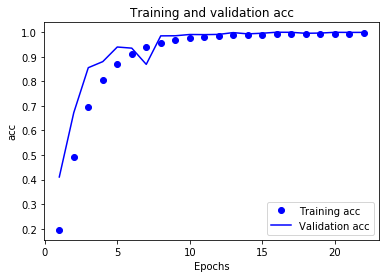

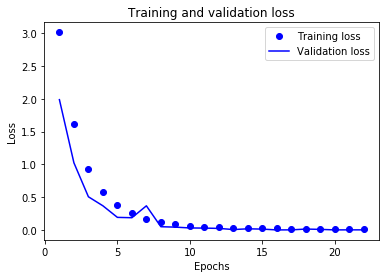

In [29]:
# Construct Data Generator

GenTrainData=GenerateGeneralData(BatchSize=batch_size,
                                  ListRawDataMain=list_rawdataTemp.copy(),
                                  SubjectArrayShuffled=subject_number_array_shuffled,
                                  ListChannel=list_channel,
                                  RemoveBaseLineFlag=RemoveBaseLine,
                                  OrthogonalFlag=Orthogonal,
                                  WindowLen=window_len,
                                  OuterSampleShift=outer_sample_shift,
                                  InnerSampleShift=inner_sample_shift,
                                  SampelNumberPerSec=sampel_number_per_sec,
                                  ImageArrayShuffled=train_shuff)

GenValidationData =GenerateGeneralData(BatchSize=batch_size,
                                        ListRawDataMain=list_rawdataTemp.copy(),
                                        SubjectArrayShuffled=subject_number_array_shuffled,
                                        ListChannel=list_channel,
                                        RemoveBaseLineFlag=RemoveBaseLine,
                                        OrthogonalFlag=Orthogonal,
                                        WindowLen=window_len,
                                        OuterSampleShift=outer_sample_shift,
                                        InnerSampleShift=inner_sample_shift,
                                        SampelNumberPerSec=sampel_number_per_sec,
                                        ImageArrayShuffled=val_shuff)

GenTestData=GenerateGeneralData(BatchSize=batch_size,
                                ListRawDataMain=list_rawdataTemp.copy(),
                                SubjectArrayShuffled=subject_number_array_shuffled,
                                ListChannel=list_channel,
                                RemoveBaseLineFlag=RemoveBaseLine,
                                OrthogonalFlag=Orthogonal,
                                WindowLen=window_len,
                                OuterSampleShift=outer_sample_shift,
                                InnerSampleShift=inner_sample_shift,
                                SampelNumberPerSec=sampel_number_per_sec,
                                ImageArrayShuffled=test_shuff)

#################################################################################################
# Create Model
model = models.Sequential()
model.add(layers.Conv2D(128, (3,3), activation = 'relu', padding='same', input_shape = (window_len,160,ch_number) ))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(512, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(subject_numberT, activation = 'softmax'))

model.compile(loss= 'categorical_crossentropy',
              optimizer= optimizers.RMSprop(lr= 1e-4),
              metrics = ['acc'])

#################################################################################################
earlystopping_callback = EarlyStopping(monitor='val_loss',verbose=0,min_delta=0,patience=6,mode='auto', restore_best_weights=True)
# Train the Model
history = model.fit_generator(epochs =50,
                              generator=GenTrainData,
                              steps_per_epoch=np.ceil(train_number*subject_number/batch_size),
                              callbacks=[earlystopping_callback],
                              validation_data=GenValidationData,
                              validation_steps =np.ceil(val_number*subject_number/batch_size),
                              use_multiprocessing=False,
                              workers=1)

#################################################################################################
# Evalute the Model
TrainResult      =model.evaluate_generator(GenTrainData,steps=np.ceil(train_number*subject_number/batch_size))
ValidationResult =model.evaluate_generator(GenValidationData,steps=np.ceil(val_number*subject_number/batch_size))
TestResult       =model.evaluate_generator(GenTestData,steps=np.ceil(test_number*subject_number/batch_size))
print('     TrainResult ([loss , acc])=',TrainResult)
print('ValidationResult ([loss , acc])=',ValidationResult)
print('      TestResult ([loss , acc])=',TestResult)

#################################################################################################
# plot accuracy
history_dict = history.history 
acc_values = history_dict ['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)


#plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation acc') 
plt.xlabel('Epochs') 
plt.ylabel('acc') 
plt.legend()
plt.show()

history_dict = history.history 
loss_values = history_dict ['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()

Epoch 1/20
1235/1235 [==============================] - 33s 27ms/step - loss: 0.0160 - acc: 0.9954 - val_loss: 1.3491e-04 - val_acc: 1.0000
Epoch 2/20
1235/1235 [==============================] - 32s 26ms/step - loss: 0.0160 - acc: 0.9956 - val_loss: 0.0014 - val_acc: 0.9996
Epoch 3/20
1235/1235 [==============================] - 32s 26ms/step - loss: 0.0150 - acc: 0.9955 - val_loss: 2.7661e-04 - val_acc: 1.0000
Epoch 4/20
1235/1235 [==============================] - 32s 26ms/step - loss: 0.0152 - acc: 0.9960 - val_loss: 0.0059 - val_acc: 0.9982
Epoch 5/20
1235/1235 [==============================] - 32s 26ms/step - loss: 0.0121 - acc: 0.9965 - val_loss: 0.0020 - val_acc: 0.9991
Epoch 6/20
1235/1235 [==============================] - 32s 26ms/step - loss: 0.0141 - acc: 0.9960 - val_loss: 0.0032 - val_acc: 0.9988
Epoch 7/20
1235/1235 [==============================] - 32s 26ms/step - loss: 0.0130 - acc: 0.9966 - val_loss: 0.0020 - val_acc: 0.9996
     TrainResult ([loss , acc])= [7.6708

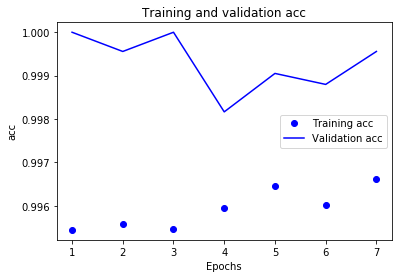

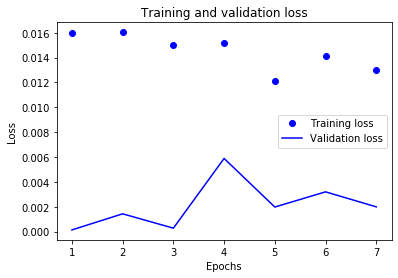

In [36]:
earlystopping_callback = EarlyStopping(monitor='val_loss',verbose=0,min_delta=0,patience=6,mode='auto', restore_best_weights=True)
# Train the Model
history = model.fit_generator(epochs =20,
                              generator=GenTrainData,
                              steps_per_epoch=np.ceil(train_number*subject_number/batch_size),
                              callbacks=[earlystopping_callback],
                              validation_data=GenValidationData,
                              validation_steps =np.ceil(val_number*subject_number/batch_size),
                              use_multiprocessing=False,
                              workers=1)

#################################################################################################
# Evalute the Model
TrainResult      =model.evaluate_generator(GenTrainData,steps=np.ceil(train_number*subject_number/batch_size))
ValidationResult =model.evaluate_generator(GenValidationData,steps=np.ceil(val_number*subject_number/batch_size))
TestResult       =model.evaluate_generator(GenTestData,steps=np.ceil(test_number*subject_number/batch_size))
print('     TrainResult ([loss , acc])=',TrainResult)
print('ValidationResult ([loss , acc])=',ValidationResult)
print('      TestResult ([loss , acc])=',TestResult)

#################################################################################################
# plot accuracy
history_dict = history.history 
acc_values = history_dict ['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)


#plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation acc') 
plt.xlabel('Epochs') 
plt.ylabel('acc') 
plt.legend()
plt.show()

history_dict = history.history 
loss_values = history_dict ['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [0]:
#model.save('/content/drive/My Drive/mymodels/true2_orth_newmodel_Oz_T7_C3.h5')

In [68]:
model = load_model('/content/drive/My Drive/mymodels/true2_orth_newmodel_Oz_T7_C3.h5')
model.summary()
model.pop()
model.pop()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 20, 160, 128)      3584      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 10, 80, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 78, 256)        295168    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 39, 256)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 2, 37, 512)        1180160   
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 1, 18, 512)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)             

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [0]:
def subject_Predict_generator(batch_size, mymodel, subject_arr, img_arr ):
  sn = len(subject_arr)
  imgn = len(img_arr)
  pre_GenTestData=GenerateGeneralData(BatchSize=batch_size,
                                  ListRawDataMain=list_rawdataTemp.copy(),
                                  SubjectArrayShuffled= subject_arr,
                                  ListChannel=list_channel,
                                  RemoveBaseLineFlag=RemoveBaseLine,
                                  OrthogonalFlag=Orthogonal,
                                  WindowLen=window_len,
                                  OuterSampleShift=outer_sample_shift,
                                  InnerSampleShift=inner_sample_shift,
                                  SampelNumberPerSec=sampel_number_per_sec,
                                  ImageArrayShuffled= img_arr)

  pre_Subject = mymodel.predict_generator(pre_GenTestData,steps=np.ceil(imgn*sn/batch_size))
  return pre_Subject

In [0]:
total_vector=[]
subject_img_idx_array = np.arange(subject_img_number)

for i in range(109):
  Si_vectors = subject_Predict_generator(len(subject_img_idx_array), model, [i], subject_img_idx_array)
  total_vector.append(Si_vectors)



In [71]:
import h5py
hf = h5py.File('/content/drive/My Drive/mymodels/true_total_vectors_orth_newmodel_Oz_T7_C3_160_spw.h5', 'w')
hf.create_dataset('/content/drive/My Drive/mymodels/dataset_total_vectors', data=total_vector)
hf.close()
hf = h5py.File('/content/drive/My Drive/mymodels/true_total_vectors_orth_newmodel_Oz_T7_C3_160_spw.h5', 'r')
vec = hf.get('/content/drive/My Drive/mymodels/dataset_total_vectors')
vec


<HDF5 dataset "dataset_total_vectors": shape (109, 59, 1024), type "<f4">

In [0]:
### verification with middle of samples

def VerifySubject(threshold, s1, smp1, s2, smp2):
  list_d =[]

  for i in range(len(smp1)):
    #print(s1 ,vec1[i] )
    d= distance.cosine(vec[s1][smp1[i]], vec[s2][smp2[i]])
    list_d.append(d)
  midd = statistics.median_low(list_d)

  if (midd) <threshold :
    return 0 # same
  else:
    return 1 # different


In [0]:
### generate data for verification
def counter_true_false_result(start_index_s1, end_index_s1 ,start_index_s2, end_index_s2 ):
  
  threshold = 0
  pair_number = 2000
  sample_img_num = 25
  Batch_size = 25
  ITER = pair_number //2


  path = "/content/drive/My Drive/z_Middle Verification Threshold_EER/"+" h5 file- cosian dist_true ORTH new model" +str(sample_img_num)+"sample num_"+str(pair_number)+"pair_"+ "ouer shift" + str(outer_sample_shift)

  try:
      os.mkdir(path)
  except OSError:
      print ("Creation of the directory %s failed" % path)
  else:
      print ("Successfully created the directory %s " % path)



  
  ## CSV file name 
  csvFileName =str(sample_img_num)+"sample num_"+str(pair_number)+"pair"+ "_MIDDLE threshold_S1(" + str(start_index_s1)+ "-" + str(end_index_s1) + ")_S2("+ str(start_index_s2)+ "-" + str(end_index_s2) + ")" +".csv"
  completeName = os.path.join(path, csvFileName )

  png_FileName =str(sample_img_num)+"sample num_"+str(pair_number)+"pair"+ "_MIDDLE threshold_S1(" + str(start_index_s1)+ "-" + str(end_index_s1) + ")_S2("+ str(start_index_s2)+ "-" + str(end_index_s2) + ")" +".png"
  png_completeName = os.path.join(path, png_FileName )

  list_threshold = []
  list_TP = []
  list_TN = []
  list_FP = []
  list_FN = []
  list_FRR = []
  list_FAR = []
  list_EER = []
  list_Correct_Verifi_Percentage = []
  list_threshold_result =[]


  for j in range(1,20):

      threshold =0.25+ (j*0.002)
      #threshold = j
      TP =0
      TN =0
      FP =0
      FN =0
      FAR =0
      FRR =0
      EER =0
      true_result= 0
      false_result = 0
      Correct_Verifi_Percentage = 0

      for i in range(ITER):
        
          # subject 1 Genuine
          S1_rand = random.randint(start_index_s1, end_index_s1)
          # shuffled img indx array
          pre_S1_img_shuffled = np.arange(subject_img_number)
          np.random.shuffle(pre_S1_img_shuffled)

          # group sample 1
          S1_Sample_rand1 = pre_S1_img_shuffled[:sample_img_num]
          # group sample 2
          S1_Sample_rand2 = pre_S1_img_shuffled[sample_img_num : sample_img_num *2]

          # Genuine verify
          result1 = VerifySubject( threshold, S1_rand, S1_Sample_rand1, S1_rand, S1_Sample_rand2)
          
          if result1 == 0:
            true_result = true_result+1
            TP = TP +1 #TP
          else:
            false_result = false_result+1
            FN = FN +1

          # subject 2
          S2_rand = random.randint(start_index_s2, end_index_s2)
          while S2_rand == S1_rand:
            S2_rand = random.randint(start_index_s2, end_index_s2)

          # shuffled img indx array
          pre_S2_img_shuffled=np.arange(subject_img_number)
          np.random.shuffle(pre_S2_img_shuffled)
          # group sample
          S2_Sample_rand = pre_S2_img_shuffled[:sample_img_num]

          # Impostor vrify
          result2 = VerifySubject( threshold, S1_rand, S1_Sample_rand1, S2_rand, S2_Sample_rand)

          if result2 == 1:
            true_result = true_result+1
            TN = TN +1
          else: 
            false_result = false_result+1
            FP = FP +1
        
      #print(result1 , result2)
      Correct_Verifi_Percentage = (true_result *100) / (true_result + false_result)
      FAR = FP / (FP+TN)
      FRR = FN / (FN+TP)
      EER = (FAR+FRR) / 2

      list_threshold.append(threshold)
      list_TP.append(TP)
      list_TN.append(TN)
      list_FP.append(FP)
      list_FN.append(FN)
      list_FAR.append(FAR)
      list_FRR.append(FRR)
      list_EER.append(EER)
      list_Correct_Verifi_Percentage.append(Correct_Verifi_Percentage)
      ## print result
      print(threshold,'.', '\n', Correct_Verifi_Percentage,'%','\n',"true_result:",true_result,"false_result:",false_result,'\n',"TP:",TP,"FN:",FN,"FRR:",FRR ,'\n',"TN:",TN,"FP:",FP,"FAR:", FAR,'\n',"EER:",EER,'\n' )

  ##plot
  plt.plot(list_FRR, list_FAR  ) 
  plt.xlabel('FRR') 
  plt.ylabel('FAR') 
  plt.legend()
  plt.savefig(png_completeName) 


  list_threshold_result.append([(list_threshold[j], list_Correct_Verifi_Percentage[j], list_FAR[j], list_FRR[j] , list_EER[j], list_TP[j], list_FN[j], list_TN[j], list_FP[j] ) for j in range(len(list_Correct_Verifi_Percentage)) ])

  with open(completeName, 'w+') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                          quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(list_threshold_result[0])


Successfully created the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/ h5 file- cosian dist_true ORTH new model25sample num_2000pair_ouer shift8 
0.252 . 
 97.5 % 
 true_result: 1950 false_result: 50 
 TP: 972 FN: 28 FRR: 0.028 
 TN: 978 FP: 22 FAR: 0.022 
 EER: 0.025 

0.254 . 
 97.75 % 
 true_result: 1955 false_result: 45 
 TP: 978 FN: 22 FRR: 0.022 
 TN: 977 FP: 23 FAR: 0.023 
 EER: 0.0225 

0.256 . 
 97.8 % 
 true_result: 1956 false_result: 44 
 TP: 975 FN: 25 FRR: 0.025 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.022 

0.258 . 
 98.15 % 
 true_result: 1963 false_result: 37 
 TP: 981 FN: 19 FRR: 0.019 
 TN: 982 FP: 18 FAR: 0.018 
 EER: 0.0185 

0.26 . 
 97.9 % 
 true_result: 1958 false_result: 42 
 TP: 974 FN: 26 FRR: 0.026 
 TN: 984 FP: 16 FAR: 0.016 
 EER: 0.020999999999999998 

0.262 . 
 98.0 % 
 true_result: 1960 false_result: 40 
 TP: 979 FN: 21 FRR: 0.021 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.02 

0.264 . 
 98.35 % 
 true_result: 1967 false_result: 33 
 TP: 9

No handles with labels found to put in legend.


0.308 . 
 97.65 % 
 true_result: 1953 false_result: 47 
 TP: 997 FN: 3 FRR: 0.003 
 TN: 956 FP: 44 FAR: 0.044 
 EER: 0.0235 



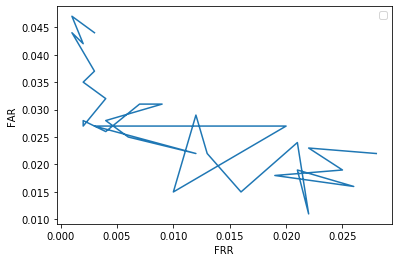

In [55]:
#1. train subject , train subject
counter_true_false_result(0,89, 0,89) 

In [56]:
#1. train subject , train subject
counter_true_false_result(0,89, 0,89) 

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/ h5 file- cosian dist_true ORTH new model25sample num_2000pair_ouer shift8 failed
0.252 . 
 97.9 % 
 true_result: 1958 false_result: 42 
 TP: 975 FN: 25 FRR: 0.025 
 TN: 983 FP: 17 FAR: 0.017 
 EER: 0.021 

0.254 . 
 97.6 % 
 true_result: 1952 false_result: 48 
 TP: 969 FN: 31 FRR: 0.031 
 TN: 983 FP: 17 FAR: 0.017 
 EER: 0.024 

0.256 . 
 97.4 % 
 true_result: 1948 false_result: 52 
 TP: 968 FN: 32 FRR: 0.032 
 TN: 980 FP: 20 FAR: 0.02 
 EER: 0.026000000000000002 

0.258 . 
 97.9 % 
 true_result: 1958 false_result: 42 
 TP: 973 FN: 27 FRR: 0.027 
 TN: 985 FP: 15 FAR: 0.015 
 EER: 0.020999999999999998 

0.26 . 
 97.65 % 
 true_result: 1953 false_result: 47 
 TP: 975 FN: 25 FRR: 0.025 
 TN: 978 FP: 22 FAR: 0.022 
 EER: 0.0235 

0.262 . 
 98.1 % 
 true_result: 1962 false_result: 38 
 TP: 978 FN: 22 FRR: 0.022 
 TN: 984 FP: 16 FAR: 0.016 
 EER: 0.019 

0.264 . 
 97.85 % 
 true_result: 1957 false_result: 

KeyboardInterrupt: ignored

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/ h5 file- cosian dist_true ORTH new model25sample num_2000pair_ouer shift8 failed
0.252 . 
 96.6 % 
 true_result: 1932 false_result: 68 
 TP: 955 FN: 45 FRR: 0.045 
 TN: 977 FP: 23 FAR: 0.023 
 EER: 0.034 

0.254 . 
 97.85 % 
 true_result: 1957 false_result: 43 
 TP: 968 FN: 32 FRR: 0.032 
 TN: 989 FP: 11 FAR: 0.011 
 EER: 0.0215 

0.256 . 
 97.75 % 
 true_result: 1955 false_result: 45 
 TP: 968 FN: 32 FRR: 0.032 
 TN: 987 FP: 13 FAR: 0.013 
 EER: 0.0225 

0.258 . 
 97.95 % 
 true_result: 1959 false_result: 41 
 TP: 981 FN: 19 FRR: 0.019 
 TN: 978 FP: 22 FAR: 0.022 
 EER: 0.020499999999999997 

0.26 . 
 98.3 % 
 true_result: 1966 false_result: 34 
 TP: 980 FN: 20 FRR: 0.02 
 TN: 986 FP: 14 FAR: 0.014 
 EER: 0.017 

0.262 . 
 98.4 % 
 true_result: 1968 false_result: 32 
 TP: 983 FN: 17 FRR: 0.017 
 TN: 985 FP: 15 FAR: 0.015 
 EER: 0.016 

0.264 . 
 98.15 % 
 true_result: 1963 false_result: 37 
 TP: 981

No handles with labels found to put in legend.


0.308 . 
 97.1 % 
 true_result: 1942 false_result: 58 
 TP: 997 FN: 3 FRR: 0.003 
 TN: 945 FP: 55 FAR: 0.055 
 EER: 0.029 



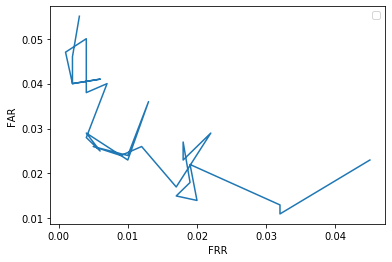

In [57]:
#2. train subject , new subject
counter_true_false_result(0,89, 90,107)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/ h5 file- cosian dist_true ORTH new model25sample num_2000pair_ouer shift8 failed
0.252 . 
 95.2 % 
 true_result: 1904 false_result: 96 
 TP: 920 FN: 80 FRR: 0.08 
 TN: 984 FP: 16 FAR: 0.016 
 EER: 0.048 

0.254 . 
 96.1 % 
 true_result: 1922 false_result: 78 
 TP: 933 FN: 67 FRR: 0.067 
 TN: 989 FP: 11 FAR: 0.011 
 EER: 0.039 

0.256 . 
 95.45 % 
 true_result: 1909 false_result: 91 
 TP: 928 FN: 72 FRR: 0.072 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.0455 

0.258 . 
 96.35 % 
 true_result: 1927 false_result: 73 
 TP: 946 FN: 54 FRR: 0.054 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.0365 

0.26 . 
 95.95 % 
 true_result: 1919 false_result: 81 
 TP: 950 FN: 50 FRR: 0.05 
 TN: 969 FP: 31 FAR: 0.031 
 EER: 0.0405 

0.262 . 
 95.75 % 
 true_result: 1915 false_result: 85 
 TP: 941 FN: 59 FRR: 0.059 
 TN: 974 FP: 26 FAR: 0.026 
 EER: 0.042499999999999996 

0.264 . 
 96.25 % 
 true_result: 1925 false_result: 75 
 TP: 94

No handles with labels found to put in legend.


0.308 . 
 98.2 % 
 true_result: 1964 false_result: 36 
 TP: 997 FN: 3 FRR: 0.003 
 TN: 967 FP: 33 FAR: 0.033 
 EER: 0.018000000000000002 



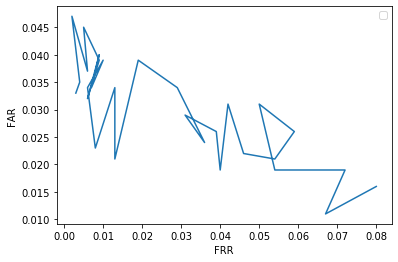

In [58]:
#3. new subject , new subject

counter_true_false_result(90,107, 0,89)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/ h5 file- cosian dist_true ORTH new model25sample num_2000pair_ouer shift8 failed
0.252 . 
 95.2 % 
 true_result: 1904 false_result: 96 
 TP: 912 FN: 88 FRR: 0.088 
 TN: 992 FP: 8 FAR: 0.008 
 EER: 0.048 

0.254 . 
 95.7 % 
 true_result: 1914 false_result: 86 
 TP: 922 FN: 78 FRR: 0.078 
 TN: 992 FP: 8 FAR: 0.008 
 EER: 0.043 

0.256 . 
 95.95 % 
 true_result: 1919 false_result: 81 
 TP: 929 FN: 71 FRR: 0.071 
 TN: 990 FP: 10 FAR: 0.01 
 EER: 0.040499999999999994 

0.258 . 
 96.45 % 
 true_result: 1929 false_result: 71 
 TP: 938 FN: 62 FRR: 0.062 
 TN: 991 FP: 9 FAR: 0.009 
 EER: 0.0355 

0.26 . 
 96.7 % 
 true_result: 1934 false_result: 66 
 TP: 945 FN: 55 FRR: 0.055 
 TN: 989 FP: 11 FAR: 0.011 
 EER: 0.033 

0.262 . 
 96.75 % 
 true_result: 1935 false_result: 65 
 TP: 944 FN: 56 FRR: 0.056 
 TN: 991 FP: 9 FAR: 0.009 
 EER: 0.0325 

0.264 . 
 96.85 % 
 true_result: 1937 false_result: 63 
 TP: 944 FN:

No handles with labels found to put in legend.


0.288 . 
 97.9 % 
 true_result: 1958 false_result: 42 
 TP: 987 FN: 13 FRR: 0.013 
 TN: 971 FP: 29 FAR: 0.029 
 EER: 0.021 



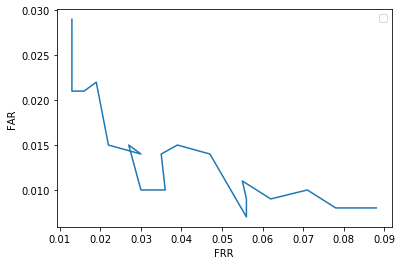

In [60]:
#4. new subject , new subject

counter_true_false_result(90,107, 90,107)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/ h5 file- cosian dist_true ORTH new model25sample num_2000pair_ouer shift8 failed
0.252 . 
 97.4 % 
 true_result: 1948 false_result: 52 
 TP: 956 FN: 44 FRR: 0.044 
 TN: 992 FP: 8 FAR: 0.008 
 EER: 0.026 

0.254 . 
 97.15 % 
 true_result: 1943 false_result: 57 
 TP: 961 FN: 39 FRR: 0.039 
 TN: 982 FP: 18 FAR: 0.018 
 EER: 0.028499999999999998 

0.256 . 
 97.3 % 
 true_result: 1946 false_result: 54 
 TP: 967 FN: 33 FRR: 0.033 
 TN: 979 FP: 21 FAR: 0.021 
 EER: 0.027000000000000003 

0.258 . 
 97.6 % 
 true_result: 1952 false_result: 48 
 TP: 963 FN: 37 FRR: 0.037 
 TN: 989 FP: 11 FAR: 0.011 
 EER: 0.024 

0.26 . 
 97.85 % 
 true_result: 1957 false_result: 43 
 TP: 974 FN: 26 FRR: 0.026 
 TN: 983 FP: 17 FAR: 0.017 
 EER: 0.0215 

0.262 . 
 97.7 % 
 true_result: 1954 false_result: 46 
 TP: 970 FN: 30 FRR: 0.03 
 TN: 984 FP: 16 FAR: 0.016 
 EER: 0.023 

0.264 . 
 97.55 % 
 true_result: 1951 false_result: 

No handles with labels found to put in legend.


0.288 . 
 97.75 % 
 true_result: 1955 false_result: 45 
 TP: 993 FN: 7 FRR: 0.007 
 TN: 962 FP: 38 FAR: 0.038 
 EER: 0.0225 



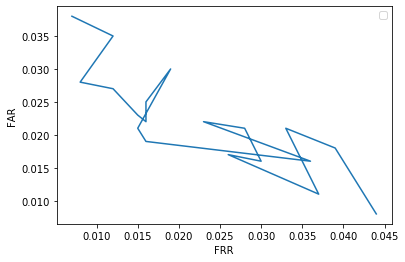

In [61]:
#5. all subject , all subject

counter_true_false_result(0,107, 0,107)

In [0]:
#####################################
# 160 sample per win

Successfully created the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/ h5 file- cosian dist_true ORTH new model25sample num_2000pair_ouer shift160 
0.252 . 
 97.8 % 
 true_result: 1956 false_result: 44 
 TP: 971 FN: 29 FRR: 0.029 
 TN: 985 FP: 15 FAR: 0.015 
 EER: 0.022 

0.254 . 
 97.95 % 
 true_result: 1959 false_result: 41 
 TP: 972 FN: 28 FRR: 0.028 
 TN: 987 FP: 13 FAR: 0.013 
 EER: 0.0205 

0.256 . 
 97.65 % 
 true_result: 1953 false_result: 47 
 TP: 973 FN: 27 FRR: 0.027 
 TN: 980 FP: 20 FAR: 0.02 
 EER: 0.0235 

0.258 . 
 98.3 % 
 true_result: 1966 false_result: 34 
 TP: 982 FN: 18 FRR: 0.018 
 TN: 984 FP: 16 FAR: 0.016 
 EER: 0.017 

0.26 . 
 98.15 % 
 true_result: 1963 false_result: 37 
 TP: 974 FN: 26 FRR: 0.026 
 TN: 989 FP: 11 FAR: 0.011 
 EER: 0.0185 

0.262 . 
 98.05 % 
 true_result: 1961 false_result: 39 
 TP: 984 FN: 16 FRR: 0.016 
 TN: 977 FP: 23 FAR: 0.023 
 EER: 0.0195 

0.264 . 
 98.75 % 
 true_result: 1975 false_result: 25 
 TP: 989 FN: 11

No handles with labels found to put in legend.


0.288 . 
 98.15 % 
 true_result: 1963 false_result: 37 
 TP: 995 FN: 5 FRR: 0.005 
 TN: 968 FP: 32 FAR: 0.032 
 EER: 0.0185 



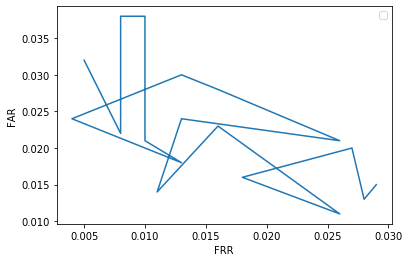

In [74]:
#1. train subject , train subject
counter_true_false_result(0,89, 0,89)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/ h5 file- cosian dist_true ORTH new model25sample num_2000pair_ouer shift160 failed
0.252 . 
 97.75 % 
 true_result: 1955 false_result: 45 
 TP: 967 FN: 33 FRR: 0.033 
 TN: 988 FP: 12 FAR: 0.012 
 EER: 0.0225 

0.254 . 
 97.5 % 
 true_result: 1950 false_result: 50 
 TP: 969 FN: 31 FRR: 0.031 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.025 

0.256 . 
 97.55 % 
 true_result: 1951 false_result: 49 
 TP: 965 FN: 35 FRR: 0.035 
 TN: 986 FP: 14 FAR: 0.014 
 EER: 0.0245 

0.258 . 
 97.9 % 
 true_result: 1958 false_result: 42 
 TP: 972 FN: 28 FRR: 0.028 
 TN: 986 FP: 14 FAR: 0.014 
 EER: 0.021 

0.26 . 
 97.15 % 
 true_result: 1943 false_result: 57 
 TP: 965 FN: 35 FRR: 0.035 
 TN: 978 FP: 22 FAR: 0.022 
 EER: 0.0285 

0.262 . 
 98.05 % 
 true_result: 1961 false_result: 39 
 TP: 982 FN: 18 FRR: 0.018 
 TN: 979 FP: 21 FAR: 0.021 
 EER: 0.0195 

0.264 . 
 98.0 % 
 true_result: 1960 false_result: 40 
 TP: 982 FN: 18 FR

No handles with labels found to put in legend.


0.288 . 
 97.5 % 
 true_result: 1950 false_result: 50 
 TP: 991 FN: 9 FRR: 0.009 
 TN: 959 FP: 41 FAR: 0.041 
 EER: 0.025 



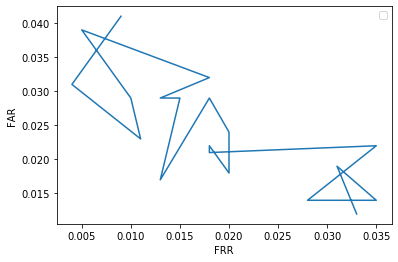

In [75]:
#2. train subject , new subject
counter_true_false_result(0,89, 90,107)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/ h5 file- cosian dist_true ORTH new model25sample num_2000pair_ouer shift160 failed
0.252 . 
 94.2 % 
 true_result: 1884 false_result: 116 
 TP: 899 FN: 101 FRR: 0.101 
 TN: 985 FP: 15 FAR: 0.015 
 EER: 0.058 

0.254 . 
 95.35 % 
 true_result: 1907 false_result: 93 
 TP: 923 FN: 77 FRR: 0.077 
 TN: 984 FP: 16 FAR: 0.016 
 EER: 0.0465 

0.256 . 
 95.2 % 
 true_result: 1904 false_result: 96 
 TP: 923 FN: 77 FRR: 0.077 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.048 

0.258 . 
 95.0 % 
 true_result: 1900 false_result: 100 
 TP: 919 FN: 81 FRR: 0.081 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.05 

0.26 . 
 95.9 % 
 true_result: 1918 false_result: 82 
 TP: 937 FN: 63 FRR: 0.063 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.041 

0.262 . 
 95.8 % 
 true_result: 1916 false_result: 84 
 TP: 941 FN: 59 FRR: 0.059 
 TN: 975 FP: 25 FAR: 0.025 
 EER: 0.041999999999999996 

0.264 . 
 96.1 % 
 true_result: 1922 false_result: 78 
 TP: 94

No handles with labels found to put in legend.


0.288 . 
 97.75 % 
 true_result: 1955 false_result: 45 
 TP: 987 FN: 13 FRR: 0.013 
 TN: 968 FP: 32 FAR: 0.032 
 EER: 0.0225 



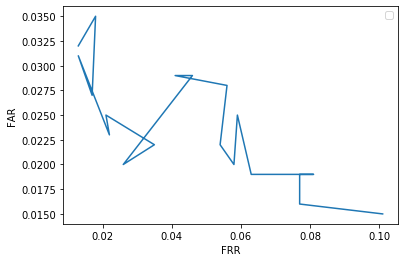

In [76]:
#3. new subject , new subject

counter_true_false_result(90,107, 0,89)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/ h5 file- cosian dist_true ORTH new model25sample num_2000pair_ouer shift160 failed
0.252 . 
 95.4 % 
 true_result: 1908 false_result: 92 
 TP: 912 FN: 88 FRR: 0.088 
 TN: 996 FP: 4 FAR: 0.004 
 EER: 0.046 

0.254 . 
 95.55 % 
 true_result: 1911 false_result: 89 
 TP: 917 FN: 83 FRR: 0.083 
 TN: 994 FP: 6 FAR: 0.006 
 EER: 0.044500000000000005 

0.256 . 
 95.95 % 
 true_result: 1919 false_result: 81 
 TP: 922 FN: 78 FRR: 0.078 
 TN: 997 FP: 3 FAR: 0.003 
 EER: 0.0405 

0.258 . 
 95.2 % 
 true_result: 1904 false_result: 96 
 TP: 915 FN: 85 FRR: 0.085 
 TN: 989 FP: 11 FAR: 0.011 
 EER: 0.048 

0.26 . 
 96.4 % 
 true_result: 1928 false_result: 72 
 TP: 939 FN: 61 FRR: 0.061 
 TN: 989 FP: 11 FAR: 0.011 
 EER: 0.036 

0.262 . 
 96.55 % 
 true_result: 1931 false_result: 69 
 TP: 946 FN: 54 FRR: 0.054 
 TN: 985 FP: 15 FAR: 0.015 
 EER: 0.0345 

0.264 . 
 96.95 % 
 true_result: 1939 false_result: 61 
 TP: 953

No handles with labels found to put in legend.


0.288 . 
 98.25 % 
 true_result: 1965 false_result: 35 
 TP: 986 FN: 14 FRR: 0.014 
 TN: 979 FP: 21 FAR: 0.021 
 EER: 0.0175 



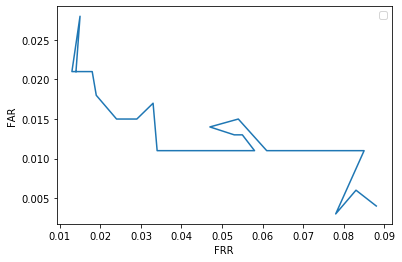

In [77]:
#4. new subject , new subject

counter_true_false_result(90,107, 90,107)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/ h5 file- cosian dist_true ORTH new model25sample num_2000pair_ouer shift160 failed
0.252 . 
 97.05 % 
 true_result: 1941 false_result: 59 
 TP: 952 FN: 48 FRR: 0.048 
 TN: 989 FP: 11 FAR: 0.011 
 EER: 0.0295 

0.254 . 
 97.8 % 
 true_result: 1956 false_result: 44 
 TP: 965 FN: 35 FRR: 0.035 
 TN: 991 FP: 9 FAR: 0.009 
 EER: 0.022000000000000002 

0.256 . 
 97.45 % 
 true_result: 1949 false_result: 51 
 TP: 965 FN: 35 FRR: 0.035 
 TN: 984 FP: 16 FAR: 0.016 
 EER: 0.025500000000000002 

0.258 . 
 97.05 % 
 true_result: 1941 false_result: 59 
 TP: 963 FN: 37 FRR: 0.037 
 TN: 978 FP: 22 FAR: 0.022 
 EER: 0.0295 

0.26 . 
 97.6 % 
 true_result: 1952 false_result: 48 
 TP: 967 FN: 33 FRR: 0.033 
 TN: 985 FP: 15 FAR: 0.015 
 EER: 0.024 

0.262 . 
 98.2 % 
 true_result: 1964 false_result: 36 
 TP: 980 FN: 20 FRR: 0.02 
 TN: 984 FP: 16 FAR: 0.016 
 EER: 0.018000000000000002 

0.264 . 
 97.95 % 
 true_result: 

No handles with labels found to put in legend.


0.288 . 
 98.1 % 
 true_result: 1962 false_result: 38 
 TP: 990 FN: 10 FRR: 0.01 
 TN: 972 FP: 28 FAR: 0.028 
 EER: 0.019 



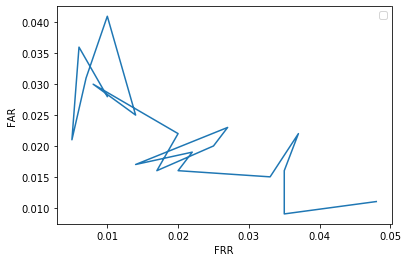

In [78]:
#5. all subject , all subject

counter_true_false_result(0,107, 0,107)